# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)


pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)

### Шаг 1. Откройте файлы с данными

In [3]:
hotel_train = pd.read_csv('C:/Users/MSI/Desktop/projects_for_r/Классификация/df/hotel_test.csv')
hotel_test = pd.read_csv('C:/Users/MSI/Desktop/projects_for_r/Классификация/df/hotel_train.csv')

### Шаг 2. Предобработка и исследовательский анализ данных

In [4]:
hotel_train.head(10)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,1,0,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,2,2,1.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2,5,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7
5,6091,1,52.00,2017,January,1,1,2,5,1.00,0.00,0.00,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,0,7
6,6092,1,143.00,2017,January,1,2,1,1,2.00,0.00,0.00,BB,BRA,Direct,0,0,0,A,1,0,Transient,0,1,2
7,6093,1,21.00,2017,January,1,2,1,3,2.00,0.00,0.00,BB,BRA,TA/TO,0,0,0,A,0,0,Transient,0,1,4
8,6094,1,89.00,2017,January,1,2,1,3,2.00,0.00,0.00,BB,GBR,TA/TO,0,0,0,E,0,0,Transient,0,0,4
9,6095,1,48.00,2017,January,1,2,1,4,2.00,0.00,0.00,BB,PRT,Direct,0,0,0,A,1,0,Transient,0,2,5


####  Обрабатываем пропуски

In [5]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [6]:
hotel_test.isna().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

In [7]:
hotel_train.isna().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

* Пропусков в данных нет

####  Удаляем выбросы

In [8]:
hotel_train.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00,32412.00
mean,60131.51,0.39,97.59,2017.00,17.80,15.66,0.87,2.34,1.86,0.08,0.01,0.03,0.01,0.17,0.22,0.26,0.05,0.66,3.21
std,29953.59,0.49,86.51,0.00,9.18,8.77,0.85,1.38,0.49,0.34,0.08,0.17,0.18,1.88,0.64,4.73,0.22,0.83,1.74
min,6086.00,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,45291.75,0.00,23.00,2017.00,10.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,53394.50,0.00,76.00,2017.00,18.00,15.50,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
75%,89800.25,1.00,155.00,2017.00,25.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00
max,97903.00,1.00,373.00,2017.00,35.00,31.00,4.00,6.00,4.00,3.00,2.00,1.00,6.00,72.00,18.00,223.00,8.00,5.00,10.00


(-10.0, 400.0)

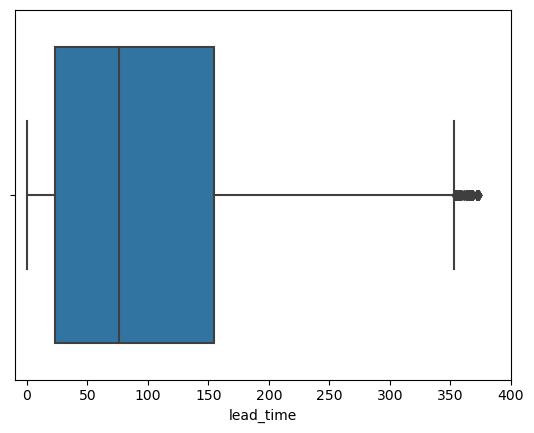

In [9]:
b = sns.boxplot(x=hotel_train["lead_time"])
b.set_xlim(-10,400)

* В столбце lead_time значений больше 0 меньше 1 процента.
* Можно предположить что это связано с какими-то особыми обстоятельствами, поэтому целесообразно при определении выбросов не брать строки с 0
* С остальными столбцами аналогично

In [10]:
hotel_train["lead_time"][hotel_train["lead_time"] > 350].count()

187

(-10.0, 40.0)

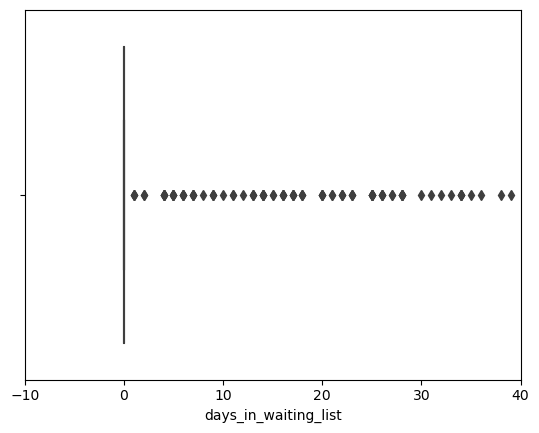

In [11]:
sns.boxplot(x=hotel_train["days_in_waiting_list"]).set_xlim(-10,40)

In [12]:
hotel_train["days_in_waiting_list"][hotel_train["days_in_waiting_list"] > 0].count()

177

(-10.0, 170.0)

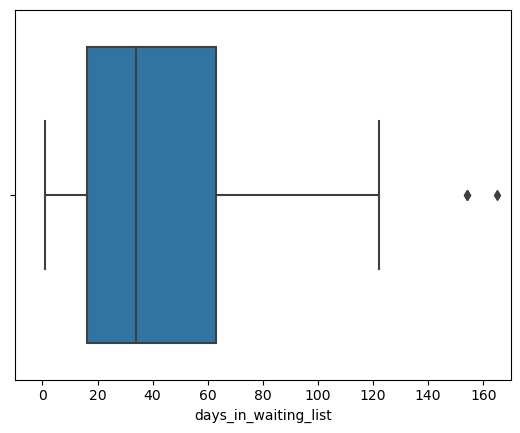

In [13]:
sns.boxplot(x=hotel_train["days_in_waiting_list"][hotel_train["days_in_waiting_list"] > 0]).set_xlim(-10,170)

In [14]:
hotel_train["days_in_waiting_list"][hotel_train["days_in_waiting_list"] > 160].count()

6

In [15]:
hotel_train["previous_cancellations"][hotel_train["previous_cancellations"] > 0].count()

226

(-1.0, 5.0)

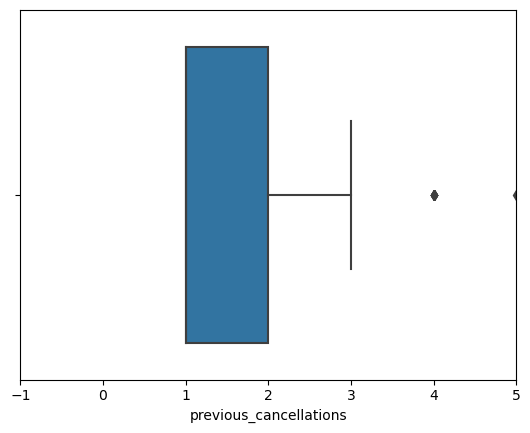

In [16]:
sns.boxplot(x=hotel_train["previous_cancellations"][hotel_train["previous_cancellations"] > 0]).set_xlim(-1,5)

In [17]:
hotel_train["previous_cancellations"][hotel_train["previous_cancellations"] > 1].count()

61

In [18]:
hotel_train["previous_bookings_not_canceled"][hotel_train["previous_bookings_not_canceled"] > 0].count()

1050

(-1.0, 15.0)

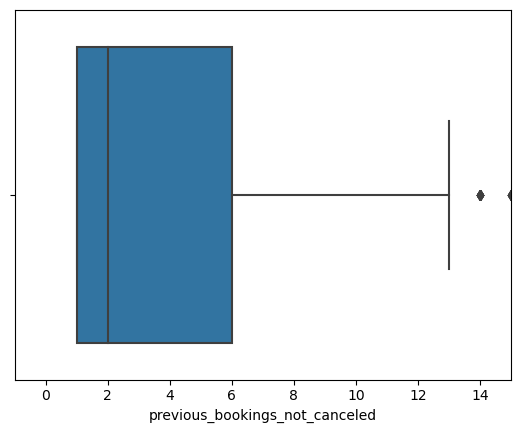

In [19]:
sns.boxplot(x=hotel_train["previous_bookings_not_canceled"][hotel_train["previous_bookings_not_canceled"] > 0]).set_xlim(-1,15)

In [20]:
hotel_train["previous_bookings_not_canceled"][hotel_train["previous_bookings_not_canceled"] > 11].count()

120

(-1.0, 10.0)

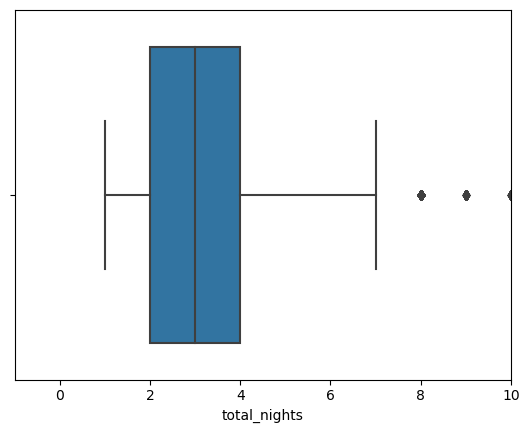

In [21]:
sns.boxplot(x=hotel_train["total_nights"]).set_xlim(-1,10) 

In [22]:
hotel_train["total_nights"][hotel_train["total_nights"] > 7].count()

332

In [23]:
hotel_train_norm = hotel_train[(hotel_train["total_nights"] <= 7) & (hotel_train["previous_bookings_not_canceled"] <= 11) & (hotel_train["previous_cancellations"] <= 1) & (hotel_train["days_in_waiting_list"] <= 160)]

In [24]:
hotel_train_norm = hotel_train_norm.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1)

In [25]:
hotel_train_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31928 entries, 0 to 32411
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31928 non-null  int64  
 1   is_canceled                     31928 non-null  int64  
 2   lead_time                       31928 non-null  float64
 3   arrival_date_year               31928 non-null  int64  
 4   arrival_date_month              31928 non-null  object 
 5   arrival_date_week_number        31928 non-null  int64  
 6   arrival_date_day_of_month       31928 non-null  int64  
 7   adults                          31928 non-null  float64
 8   children                        31928 non-null  float64
 9   babies                          31928 non-null  float64
 10  meal                            31928 non-null  object 
 11  country                         31928 non-null  object 
 12  distribution_channel            31928

* Строки с выбросами составили 2.1 % от датафрейма

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

In [26]:
hotel_prof = hotel_train[['id', 'total_nights', 'reserved_room_type', 'arrival_date_month', 'is_canceled']]

In [27]:
hotel_prof.head()

,id,total_nights,reserved_room_type,arrival_date_month,is_canceled
0,6086,1,A,January,1
1,6087,4,A,January,1
2,6088,4,A,January,1
3,6089,4,A,January,1
4,6090,7,A,January,1


In [28]:
hotel_prof['arrival_date_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [29]:
hotel_prof['reserved_room_type'].unique()

array(['A               ', 'E               ', 'G               ',
       'D               ', 'F               ', 'C               ',
       'B               '], dtype=object)

In [30]:
hotel_prof['total_nights'].unique()

array([ 1,  4,  7,  2,  5,  6,  3,  8,  9, 10], dtype=int64)

In [31]:
hotel_prof.head()

,id,total_nights,reserved_room_type,arrival_date_month,is_canceled
0,6086,1,A,January,1
1,6087,4,A,January,1
2,6088,4,A,January,1
3,6089,4,A,January,1
4,6090,7,A,January,1


In [32]:
def get_season_coefficient(value):
    if value in ['June', 'July', 'August']:
        return 1.4
    if value in ['December', 'January', 'February']:
        return 1
    else:
        return 1.2

In [33]:
hotel_prof['coefficient'] = hotel_prof['arrival_date_month'].apply(get_season_coefficient)
hotel_prof.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\2232305133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_prof['coefficient'] = hotel_prof['arrival_date_month'].apply(get_season_coefficient)


,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient
0,6086,1,A,January,1,1.00
1,6087,4,A,January,1,1.00
2,6088,4,A,January,1,1.00
3,6089,4,A,January,1,1.00
4,6090,7,A,January,1,1.00


In [34]:
def get_price_room(type_room):
    if type_room == 'A               ':
        return 1000
    if type_room == 'B               ':
        return 800
    if type_room == 'C               ':
        return 600
    if type_room == 'D               ':
        return 550
    if type_room == 'E               ':
        return 500
    if type_room == 'F               ':
        return 450
    if type_room == 'G               ':
        return 350
    

In [35]:
hotel_prof['price_room'] = hotel_prof['reserved_room_type'].apply(get_price_room)
hotel_prof.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\884567336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_prof['price_room'] = hotel_prof['reserved_room_type'].apply(get_price_room)


,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient,price_room
0,6086,1,A,January,1,1.00,1000
1,6087,4,A,January,1,1.00,1000
2,6088,4,A,January,1,1.00,1000
3,6089,4,A,January,1,1.00,1000
4,6090,7,A,January,1,1.00,1000


In [36]:
def get_price_cleaning(type_room):
    if type_room == 'A               ':
        return 400
    if type_room == 'B               ':
        return 350
    if type_room == 'C               ':
        return 350
    if type_room == 'D               ':
        return 150
    if type_room == 'E               ':
        return 150
    if type_room == 'F               ':
        return 150
    if type_room == 'G               ':
        return 150

In [37]:
hotel_prof['price_cleaning'] = hotel_prof['reserved_room_type'].apply(get_price_cleaning)
hotel_prof.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\1111791215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_prof['price_cleaning'] = hotel_prof['reserved_room_type'].apply(get_price_cleaning)


,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient,price_room,price_cleaning
0,6086,1,A,January,1,1.00,1000,400
1,6087,4,A,January,1,1.00,1000,400
2,6088,4,A,January,1,1.00,1000,400
3,6089,4,A,January,1,1.00,1000,400
4,6090,7,A,January,1,1.00,1000,400


In [38]:
def get_quantity_cleaning(row):
    if row['is_canceled'] == 0:
        return 1 + row['total_nights'] // 2
    else:
        return 1

In [39]:
hotel_prof['quantity_cleaning'] = hotel_prof.apply(get_quantity_cleaning, axis=1)
hotel_prof.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\3003025102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_prof['quantity_cleaning'] = hotel_prof.apply(get_quantity_cleaning, axis=1)


,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient,price_room,price_cleaning,quantity_cleaning
0,6086,1,A,January,1,1.00,1000,400,1
1,6087,4,A,January,1,1.00,1000,400,1
2,6088,4,A,January,1,1.00,1000,400,1
3,6089,4,A,January,1,1.00,1000,400,1
4,6090,7,A,January,1,1.00,1000,400,1


In [40]:
df_revenue = hotel_prof[hotel_prof['is_canceled'] == 0]
df_expenses = hotel_prof[hotel_prof['is_canceled'] == 1]

#### Доходы

In [41]:
df_revenue.head()

,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient,price_room,price_cleaning,quantity_cleaning
95,6184,1,A,January,0,1.00,1000,400,1
299,6391,4,A,February,0,1.00,1000,400,3
2041,8148,1,A,August,0,1.40,1000,400,1
2125,8232,3,A,February,0,1.00,1000,400,2
2126,8236,1,A,January,0,1.00,1000,400,1


In [42]:
df_revenue['revenue'] = (df_revenue['price_room'] * df_revenue['total_nights'] * df_revenue['coefficient'])
df_revenue['expenses'] = (df_revenue['price_cleaning'] * df_revenue['quantity_cleaning'])
df_revenue['income'] = df_revenue['revenue'] - df_revenue['expenses']
df_revenue.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\3702311985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['revenue'] = (df_revenue['price_room'] * df_revenue['total_nights'] * df_revenue['coefficient'])
C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\3702311985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['expenses'] = (df_revenue['price_cleaning'] * df_revenue['quantity_cleaning'])
C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\3702311985.py:3: SettingWithCopyWarning: 
A val

,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient,price_room,price_cleaning,quantity_cleaning,revenue,expenses,income
95,6184,1,A,January,0,1.00,1000,400,1,1000.00,400,600.00
299,6391,4,A,February,0,1.00,1000,400,3,4000.00,1200,2800.00
2041,8148,1,A,August,0,1.40,1000,400,1,1400.00,400,1000.00
2125,8232,3,A,February,0,1.00,1000,400,2,3000.00,800,2200.00
2126,8236,1,A,January,0,1.00,1000,400,1,1000.00,400,600.00


In [43]:
revenue = df_revenue['income'].sum()
revenue

50624480.0

#### Расходы

In [44]:
df_expenses.head()

,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient,price_room,price_cleaning,quantity_cleaning
0,6086,1,A,January,1,1.00,1000,400,1
1,6087,4,A,January,1,1.00,1000,400,1
2,6088,4,A,January,1,1.00,1000,400,1
3,6089,4,A,January,1,1.00,1000,400,1
4,6090,7,A,January,1,1.00,1000,400,1


In [45]:
df_expenses['expenses'] = df_expenses['coefficient'] * df_expenses['price_room'] + df_expenses['price_cleaning']
df_expenses.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\2899194248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expenses['expenses'] = df_expenses['coefficient'] * df_expenses['price_room'] + df_expenses['price_cleaning']


,id,total_nights,reserved_room_type,arrival_date_month,is_canceled,coefficient,price_room,price_cleaning,quantity_cleaning,expenses
0,6086,1,A,January,1,1.00,1000,400,1,1400.00
1,6087,4,A,January,1,1.00,1000,400,1,1400.00
2,6088,4,A,January,1,1.00,1000,400,1,1400.00
3,6089,4,A,January,1,1.00,1000,400,1,1400.00
4,6090,7,A,January,1,1.00,1000,400,1,1400.00


In [46]:
expenses = df_expenses['expenses'].sum()

#### Вывод

In [47]:
revenue

50624480.0

In [48]:
expenses

18041560.0

In [49]:
income = revenue - expenses
income

32582920.0

* Прибыль - 66 150 370.0
* Убытки - 35 655 550.0
* Бизнес задача: После введения системы прогнозирования прибаль должна быть больше чем 66 150 370.0 + 400 000

### Шаг 4. Разработка модели ML

#### Подготовка к обучению модели ML

In [50]:
hotel_train_norm.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,1.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


In [51]:
hotel_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.00,2015,July,27,1,0,1,1.00,0.00,0.00,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.00,2015,July,27,1,0,2,2.00,0.00,0.00,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.00,2015,July,27,1,0,2,2.00,0.00,0.00,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.00,2015,July,27,1,0,2,2.00,0.00,0.00,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.00,2015,July,27,1,0,3,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


In [52]:
hotel_train_norm['arrival_date_week_number'].value_counts()

arrival_date_week_number
17    1286
18    1259
20    1247
15    1208
21    1162
22    1139
14    1091
23    1077
19    1065
8     1044
24    1014
16    1013
26    1000
11     988
7      981
25     976
9      942
10     938
28     938
12     917
13     906
27     836
33     777
4      770
30     761
31     715
3      713
2      706
1      696
29     695
5      664
6      650
32     633
34     617
35     504
Name: count, dtype: int64

In [53]:
hotel_train_norm['arrival_date_day_of_month'].value_counts()

arrival_date_day_of_month
15    1292
9     1213
2     1182
28    1124
25    1113
27    1110
14    1104
3     1102
19    1099
26    1097
24    1093
5     1077
13    1066
6     1066
8     1051
23    1050
17    1046
1     1032
20    1027
10    1021
16    1019
18    1014
21     994
12     992
11     981
22     909
4      903
29     897
7      871
30     839
31     544
Name: count, dtype: int64

* Удаляем столбцы 'arrival_date_year', 'id', 'arrival_date_week_number' и 'arrival_date_day_of_month', т.к. они не нужны для обучения

In [54]:
hotel_train_norm_final = hotel_train_norm.drop(['arrival_date_year', 'id', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1)

In [55]:
hotel_test_final = hotel_test.drop(['arrival_date_year', 'id', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights'], axis=1)

In [56]:
hotel_train_norm_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31928 entries, 0 to 32411
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     31928 non-null  int64  
 1   lead_time                       31928 non-null  float64
 2   arrival_date_month              31928 non-null  object 
 3   adults                          31928 non-null  float64
 4   children                        31928 non-null  float64
 5   babies                          31928 non-null  float64
 6   meal                            31928 non-null  object 
 7   country                         31928 non-null  object 
 8   distribution_channel            31928 non-null  object 
 9   is_repeated_guest               31928 non-null  int64  
 10  previous_cancellations          31928 non-null  int64  
 11  previous_bookings_not_canceled  31928 non-null  int64  
 12  reserved_room_type              31928

In [57]:
hotel_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     65229 non-null  int64  
 1   lead_time                       65229 non-null  float64
 2   arrival_date_month              65229 non-null  object 
 3   adults                          65229 non-null  float64
 4   children                        65229 non-null  float64
 5   babies                          65229 non-null  float64
 6   meal                            65229 non-null  object 
 7   country                         65229 non-null  object 
 8   distribution_channel            65229 non-null  object 
 9   is_repeated_guest               65229 non-null  int64  
 10  previous_cancellations          65229 non-null  int64  
 11  previous_bookings_not_canceled  65229 non-null  int64  
 12  reserved_room_type              

#####   Исследование баланса классов

In [58]:
hotel_train_norm_final['is_canceled'].value_counts()

is_canceled
0    19478
1    12450
Name: count, dtype: int64

In [59]:
hotel_test_final['is_canceled'].value_counts()

is_canceled
0    41185
1    24044
Name: count, dtype: int64

* классы не сбалансированы - соотношение примерно 1\2

#####  Подготовка признаков обучающей выборки

df_train = hotel_train_norm_final_ohe

In [60]:
df_train = hotel_train_norm_final

In [61]:
features_train = df_train.drop(['is_canceled'], axis=1)
target_train = df_train['is_canceled']

#####  Подготовка признаков тестовой выборки

In [62]:
features_test = hotel_test_final.drop(['is_canceled'], axis=1)
target_test = hotel_test_final['is_canceled']

#####  Преобразование категориальных признаков в численные - OHE у

In [63]:
features_train.head()

,lead_time,arrival_date_month,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,74.00,January,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,62.00,January,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,62.00,January,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,71.00,January,1.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,172.00,January,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


In [64]:
features_test.head()

,lead_time,arrival_date_month,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,7.00,July,1.00,0.00,0.00,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,14.00,July,2.00,0.00,0.00,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,0.00,July,2.00,0.00,0.00,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,9.00,July,2.00,0.00,0.00,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,85.00,July,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


In [65]:
categorical_columns = ['arrival_date_month', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'customer_type']
numeric = list(features_train.columns)
numeric_columns = []
for i in numeric:
    if i not in categorical_columns:
        numeric_columns.append(i)

In [66]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder.fit(features_train[categorical_columns])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [67]:
features_encoded = pd.DataFrame(
      encoder.transform(features_train[categorical_columns]).toarray(),
      columns=encoder.get_feature_names_out(categorical_columns),
      index=features_train.index
)

features_train = pd.concat((features_train[numeric_columns], features_encoded), axis=1)

In [68]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31928 entries, 0 to 32411
Columns: 184 entries, lead_time to customer_type_Transient-Party
dtypes: float64(177), int64(7)
memory usage: 45.1 MB


In [69]:
features_test_encoded = pd.DataFrame(
      encoder.transform(features_test[categorical_columns]).toarray(),
      columns=encoder.get_feature_names_out(categorical_columns),
      index=features_test.index
)
features_test = pd.concat((features_test[numeric_columns], features_test_encoded), axis=1)

Z:\KOD\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [70]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31928 entries, 0 to 32411
Columns: 184 entries, lead_time to customer_type_Transient-Party
dtypes: float64(177), int64(7)
memory usage: 45.1 MB


#####  Маштабирование данных

In [71]:
numeric_final = list(features_train.columns)


In [72]:
scaler = StandardScaler()
scaler.fit(features_train[numeric_final])
features_train[numeric_final] = scaler.transform(features_train[numeric_final])

In [73]:
features_test[numeric_final] = scaler.transform(features_test[numeric_final])

In [74]:
features_test.describe()

,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_August,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_August,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,meal_FB,meal_HB,meal_SC,meal_SC,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BEL,country_BEN,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BRA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYP,country_CZE,country_DEU,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GHA,country_GIB,country_GNB,country_GRC,country_GTM,country_HKG,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KIR,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MLT,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NCL,country_NGA,country_NLD,country_NOR,country_NPL,country_NZL,country_PAK,country_PAN,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_PRY,country_QAT,country_ROU,country_RUS,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VNM,country_ZAF,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,is_repeated_guest_1,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,65229.00,

In [75]:
features_train.describe()

,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_August,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_August,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,meal_FB,meal_HB,meal_SC,meal_SC,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BEL,country_BEN,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BRA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYP,country_CZE,country_DEU,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GHA,country_GIB,country_GNB,country_GRC,country_GTM,country_HKG,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KIR,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MLT,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NCL,country_NGA,country_NLD,country_NOR,country_NPL,country_NZL,country_PAK,country_PAN,country_PER,country_PHL,country_POL,country_PRI,country_PRT,country_PRY,country_QAT,country_ROU,country_RUS,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VNM,country_ZAF,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,is_repeated_guest_1,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,31928.00,

In [76]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31928 entries, 0 to 32411
Columns: 184 entries, lead_time to customer_type_Transient-Party
dtypes: float64(184)
memory usage: 45.1 MB


In [77]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Columns: 184 entries, lead_time to customer_type_Transient-Party
dtypes: float64(184)
memory usage: 91.6 MB


In [78]:
target_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 65229 entries, 0 to 65228
Series name: is_canceled
Non-Null Count  Dtype
--------------  -----
65229 non-null  int64
dtypes: int64(1)
memory usage: 509.7 KB


In [79]:
target_train.info()

<class 'pandas.core.series.Series'>
Index: 31928 entries, 0 to 32411
Series name: is_canceled
Non-Null Count  Dtype
--------------  -----
31928 non-null  int64
dtypes: int64(1)
memory usage: 498.9 KB


#### DecisionTreeClassifier

In [80]:
model_dtc = DecisionTreeClassifier()
parametrs_dtc = {'max_depth': range (1, 21, 2) }

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не забывай указывать значение random_state при инициализации моделей, чтобы результаты были воспроизводимы</div>

In [81]:
grid_dtc = GridSearchCV(model_dtc, parametrs_dtc, cv=5, scoring='recall')
grid_dtc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21, 2)}, scoring='recall')

In [82]:
print(grid_dtc.best_params_)
print(grid_dtc.best_score_)

{'max_depth': 7}
0.5750200803212852


In [83]:
model_dtc_final = DecisionTreeClassifier(random_state = 12345, max_depth=7, class_weight='balanced')

In [84]:
recall = cross_val_score(model_dtc_final, features_train, target_train, cv=5, scoring='recall').mean()
recall

0.7023293172690763

#### RandomForest

In [85]:
model_rfc = RandomForestClassifier()
parametrs_rfc = { 'n_estimators': range (10, 101, 10),
              'max_depth': range (1, 21, 2) }

In [86]:
grid_rfc = GridSearchCV(model_rfc, parametrs_rfc, cv=5, scoring='recall')
grid_rfc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 21, 2),
                         'n_estimators': range(10, 101, 10)},
             scoring='recall')

In [87]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 19, 'n_estimators': 30}
0.5075502008032128


In [88]:
model_rfc_final = RandomForestClassifier(random_state = 12345, n_estimators=20, max_depth=13, class_weight='balanced')

In [89]:
recall = cross_val_score(model_rfc_final, features_train, target_train, cv=5, scoring='recall').mean()
recall

0.6456224899598394

#### LogisticRegression

In [90]:
model_lr = LogisticRegression()
parametrs_lr = {'max_iter': range(500, 2001, 500),
               'penalty' : ['l1', 'l2']}

In [91]:
grid_lr = GridSearchCV(model_lr, parametrs_lr, cv=5, scoring='recall')
grid_lr.fit(features_train, target_train)

Z:\KOD\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "Z:\KOD\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "Z:\KOD\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "Z:\KOD\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': range(500, 2001, 500),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [92]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'max_iter': 500, 'penalty': 'l2'}
0.5337349397590362


In [93]:
model_lr_final = LogisticRegression(random_state = 12345, max_iter = 500, penalty = 'l2', class_weight='balanced')
recall = cross_val_score(model_lr_final, features_train, target_train, cv=5, scoring='recall').mean()
recall

0.6297991967871487

#### Тестирование лучшей модели

In [94]:
model_dtc_final.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=12345)

In [95]:
answers = model_dtc_final.predict(features_test)

In [96]:
series = pd.Series(answers)

In [97]:
test = hotel_test_final[['total_nights', 'reserved_room_type', 'arrival_date_month', 'is_canceled']]
test.head()

,total_nights,reserved_room_type,arrival_date_month,is_canceled
0,1,A,July,0
1,2,A,July,0
2,2,C,July,0
3,2,C,July,0
4,3,A,July,1


In [98]:
test_final = pd.concat((test, series), axis=1)

In [99]:
test_final = test_final.rename(columns={0: 'predictions'})
test_final.head()

,total_nights,reserved_room_type,arrival_date_month,is_canceled,predictions
0,1,A,July,0,0
1,2,A,July,0,0
2,2,C,July,0,0
3,2,C,July,0,0
4,3,A,July,1,1


In [100]:
test_final['coefficient'] = test_final['arrival_date_month'].apply(get_season_coefficient)
test_final['price_room'] = test_final['reserved_room_type'].apply(get_price_room)
test_final['price_cleaning'] = test_final['reserved_room_type'].apply(get_price_cleaning)
test_final['quantity_cleaning'] = test_final.apply(get_quantity_cleaning, axis=1)
test_final.head(10)


,total_nights,reserved_room_type,arrival_date_month,is_canceled,predictions,coefficient,price_room,price_cleaning,quantity_cleaning
0,1,A,July,0,0,1.40,1000,400,1
1,2,A,July,0,0,1.40,1000,400,2
2,2,C,July,0,0,1.40,600,350,2
3,2,C,July,0,0,1.40,600,350,2
4,3,A,July,1,1,1.40,1000,400,1
5,3,D,July,1,1,1.40,550,150,1
6,4,E,July,1,1,1.40,500,150,1
7,4,G,July,0,0,1.40,350,150,3
8,4,D,July,0,0,1.40,550,150,3
9,4,E,July,0,1,1.40,500,150,3


In [101]:
def get_revenue(row):
    if row['is_canceled'] == 0:
        return row['price_room'] * row['total_nights'] * row['coefficient']
    else:
        return 0

In [102]:
def get_expenses(row):
    if row['is_canceled'] == 0:
        return row['price_cleaning'] * row['quantity_cleaning'] 
    else:
        return row['price_cleaning'] + (row['price_room'] * row['coefficient'])

In [103]:
def get_income_after_model(row):
    if row['is_canceled'] == 1:
        if row['predictions'] == 1:
            return (row['coefficient'] * row['price_room'] + row['price_cleaning']) * 0.8
        else:
            return 0
    else:
        return 0

In [104]:
test_final['revenue'] = test_final.apply(get_revenue, axis=1)
test_final['expenses'] = test_final.apply(get_expenses, axis=1)
test_final['income'] = test_final['revenue'] - test_final['expenses']
test_final['income_after_model'] = test_final.apply(get_income_after_model, axis=1)
test_final[test_final['is_canceled'] == 1].head(10)

,total_nights,reserved_room_type,arrival_date_month,is_canceled,predictions,coefficient,price_room,price_cleaning,quantity_cleaning,revenue,expenses,income,income_after_model
4,3,A,July,1,1,1.40,1000,400,1,0.00,1800.00,-1800.00,1440.00
5,3,D,July,1,1,1.40,550,150,1,0.00,920.00,-920.00,736.00
6,4,E,July,1,1,1.40,500,150,1,0.00,850.00,-850.00,680.00
18,4,D,July,1,1,1.40,550,150,1,0.00,920.00,-920.00,736.00
22,5,G,July,1,1,1.40,350,150,1,0.00,640.00,-640.00,512.00
26,7,G,July,1,1,1.40,350,150,1,0.00,640.00,-640.00,512.00
39,3,A,July,1,0,1.40,1000,400,1,0.00,1800.00,-1800.00,0.00
42,2,A,July,1,1,1.40,1000,400,1,0.00,1800.00,-1800.00,1440.00
43,2,A,July,1,1,1.40,1000,400,1,0.00,1800.00,-1800.00,1440.00
44,2,D,July,1,1,1.40,550,150,1,0.00,920.00,-920.00,736.00


* Прибыль до внедрения модели

In [105]:
test_final[test_final['is_canceled'] == 0]['income'].sum()

101805920.0

In [106]:
test_final[test_final['is_canceled'] == 1]['income'].sum()

-35655550.0

In [107]:
profit_model_before = test_final[test_final['is_canceled'] == 0]['income'].sum() + test_final[test_final['is_canceled'] == 1]['income'].sum()
profit_model_before

66150370.0

In [108]:
test_final['is_canceled'].value_counts()

is_canceled
0    41185
1    24044
Name: count, dtype: int64

##### Расчет прибыли для 'лучшего сценария' (Ложноположительные ответы не несут ущерба)

In [109]:
test_final[test_final['is_canceled'] == 0]['income'].sum() + test_final[test_final['is_canceled'] == 1]['income_after_model'].sum()

125162976.0

In [110]:
test_final[(test_final['is_canceled'] == 1) & (test_final['predictions'] == 0)]['income'].sum()

-6459230.0

In [111]:
df_profit_model = test_final[(test_final['is_canceled'] == 1) & (test_final['predictions'] == 1)]['income_after_model'].sum()
df_profit_model

23357056.0

In [112]:
df_income_after_model = df_profit_model + test_final[test_final['is_canceled'] == 0]['income'].sum()
df_income_after_model = df_income_after_model + test_final[(test_final['is_canceled'] == 1) & (test_final['predictions'] == 0)]['income'].sum()
df_income_after_model

118703746.0

In [113]:
df_income_after_model - profit_model_before

52553376.0

**Вывод**
* Прибыль отеля после внедрения модели увеличится на 22 535 406.0 ('Лучший сценарий')

##### Расчет прибыли для 'худшего сценария' (половина случайных клиентов из тех, с кого модель предложит взять депозит(вне зависимости от факта отмены), откажутся от услуг)

In [114]:
nol_nol = test_final[(test_final['is_canceled'] == 0) & (test_final['predictions'] == 0)]['income'].sum()
nol_nol

75803120.0

In [115]:
nol_one = test_final[(test_final['is_canceled'] == 0) & (test_final['predictions'] == 1)]['income'].sum() / 2
nol_one

13001400.0

In [116]:
one_one = df_profit_model  / 2
one_one

11678528.0

In [117]:
one_nol = test_final[(test_final['is_canceled'] == 1) & (test_final['predictions'] == 0)]['income'].sum()
one_nol

-6459230.0

In [118]:
nol_nol + nol_one + one_one + one_nol

94023818.0

In [119]:
nol_nol + nol_one + one_one + one_nol - profit_model_before

27873448.0

**Вывод**
* Прибыль отеля после внедрения модели увеличится на 9 964 594.0 ('Худший случай')

### Шаг 5. Опишите портрет «ненадёжного» клиента

* Критерии ненадежного заемщика будем определять путем группировки данных и сравнения соотношений отмен и подтверждений по всей таблице (1\2) и по конкретным категориям.
* Например после группировки по каналу дистрибуции соотношение подтверждений и отмен в TA/TO	подтверждения(32448)\отмены(22006) это больше чем 1\2, соответственно каналу дистрибуции TA/TO находится в зоне риска

In [120]:
hotel_train.shape

(32412, 25)

In [121]:
hotel_is_canceled_1 = hotel_train[hotel_train['is_canceled'] == 1] 
hotel_is_canceled_0 = hotel_train[hotel_train['is_canceled'] == 0]

In [122]:
print(hotel_is_canceled_0.shape, hotel_is_canceled_1.shape)

(19821, 25) (12591, 25)


#### "Анализ по столбцам с категориальными признаками"

In [123]:
hotel_is_canceled_0.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
95,6184,0,0.00,2017,January,4,25,0,1,1.00,0.00,0.00,BB,PRT,Corporate,0,0,0,A,0,0,Transient,0,0,1
299,6391,0,70.00,2017,February,8,22,0,4,2.00,0.00,0.00,BB,GBR,Corporate,0,0,0,A,2,0,Transient-Party,0,0,4
2041,8148,0,3.00,2017,August,33,17,0,1,1.00,0.00,0.00,BB,PRT,Corporate,0,0,0,A,0,0,Transient,0,0,1
2125,8232,0,7.00,2017,February,8,20,1,2,1.00,0.00,0.00,BB,PRT,Corporate,0,0,0,A,0,0,Transient,1,0,3
2126,8236,0,6.00,2017,January,3,17,0,1,1.00,0.00,0.00,BB,PRT,Corporate,0,0,3,A,0,0,Transient,0,0,1


##### Анализ по каналам дистрибуции

In [124]:
hotel_train.pivot_table(index = ['distribution_channel', 'is_canceled'], values = 'id', aggfunc = ['count'])\
    .sort_values(by = ('distribution_channel'), ascending = False)

count
                                     id
distribution_channel is_canceled       
TA/TO                0            15539
                     1            11544
GDS                  0               71
                     1               14
Direct               0             3019
                     1              623
Corporate            0             1192
                     1              410

* Риск - TA/TO

##### Анализ по странам

In [125]:
hotel_country = hotel_train.pivot_table(index = ['country', 'is_canceled'], values = 'id', aggfunc = ['count'])\
    .sort_values(by = ('country'), ascending = False)

In [126]:
hotel_country = hotel_country[hotel_country['count', 'id'] > 50] 
hotel_country['count', 'id'].sum()

31078

In [127]:
hotel_country

count
                       id
country is_canceled      
USA     1             239
        0             535
SWE     1              79
        0             239
RUS     1              92
        0             125
ROU     1              57
        0             101
PRT     0            3994
        1            5893
POL     1              73
        0             166
NOR     0             145
        1              97
NLD     1             163
        0             546
LUX     0              53
JPN     0              58
ITA     1             491
        0             662
ISR     0             200
        1              64
IRL     1             334
        0             726
HUN     0              53
GBR     1            1069
        0            2858
FRA     0            2620
        1             857
FIN     0             114
ESP     1             614
        0            1318
DNK     1              62
        0             120
DEU     1             573
        0            1805
CN      1             112
        0             357
CHN     1             195
        0             200
CHE     0             418
        1             184
BRA     0             488
        1             393
BEL     0             666
        1             216
AUT     1             116
        0             323
AUS     1              64
        0              97
ARG     0              54

* Риск - CHN и PRT

##### Анализ по категории номера

In [128]:
hotel_train.pivot_table(index = ['reserved_room_type', 'is_canceled'], values = 'id', aggfunc = ['count'])\
    .sort_values(by = ('reserved_room_type'), ascending = False)

count
                                   id
reserved_room_type is_canceled       
G                  0              163
                   1              115
F                  0              339
                   1              164
E                  0             1091
                   1              553
D                  0             3991
                   1             2132
C                  0              112
                   1               89
B                  0              109
                   1               83
A                  0            14016
                   1             9455

Риск - А

##### Анализ по типу заказчика

In [129]:
hotel_train.pivot_table(index = ['customer_type', 'is_canceled'], values = 'id', aggfunc = ['count'])\
    .sort_values(by = ('customer_type'), ascending = False)

count
                                id
customer_type   is_canceled       
Transient-Party 0             3694
                1              733
Transient       0            15656
                1            11805
Group           0              157
                1                8
Contract        0              314
                1               45

* Риск - Transient и Contract	

##### Анализ по признаку того, что гость бронирует номер второй раз

In [130]:
hotel_train.pivot_table(index = ['is_repeated_guest', 'is_canceled'], values = 'id', aggfunc = ['count'])\
    .sort_values(by = ('is_repeated_guest'), ascending = False)

count
                                  id
is_repeated_guest is_canceled       
1                 0              968
                  1               49
0                 0            18853
                  1            12542

* Риск - 0

##### Анализ по опциям заказа

In [131]:
hotel_train.pivot_table(index = ['meal', 'is_canceled'], values = 'id', aggfunc = ['count'])\
    .sort_values(by = ('meal'), ascending = False)

count
                          id
meal      is_canceled       
SC        0             3045
          1             1990
SC        0              207
          1               51
HB        0             1602
          1              797
FB        0               22
          1               14
BB        0            14945
          1             9739

* Риск - BB

##### Анализ по количеству подтверждённых и отмененных заказов у клиента

In [132]:
hotel_train.pivot_table(index = ['total_of_special_requests', 'is_canceled'], values = 'id', aggfunc = ['count'])\
    .sort_values(by = ('total_of_special_requests'), ascending = False)

count
                                         id
total_of_special_requests is_canceled      
5                         0              17
                          1               1
4                         0             111
                          1              13
3                         0             751
                          1             156
2                         0            2942
                          1            1046
1                         0            7237
                          1            2800
0                         0            8763
                          1            8575

* Риск - 0

##### Итог

In [133]:
 hotel_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,1,0,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,2,2,1.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2,5,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


In [134]:
hotel_risk_cat = hotel_train[(hotel_train["distribution_channel"] == 'TA/TO') & (hotel_train["reserved_room_type"] == 'A               ')& (hotel_train["is_repeated_guest"] == 0) & (hotel_train["total_of_special_requests"] == 0)]


In [135]:
hotel_risk_cat = hotel_risk_cat[(hotel_train["customer_type"] == 'Transient') | (hotel_train["customer_type"] == 'Contract')]


C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\2627690691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_risk_cat = hotel_risk_cat[(hotel_train["customer_type"] == 'Transient') | (hotel_train["customer_type"] == 'Contract')]


In [136]:
hotel_risk_cat = hotel_risk_cat[(hotel_train["country"] == 'PRT') | (hotel_train["country"] == 'CHN')]


C:\Users\MSI\AppData\Local\Temp\ipykernel_4248\2053423469.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_risk_cat = hotel_risk_cat[(hotel_train["country"] == 'PRT') | (hotel_train["country"] == 'CHN')]


In [137]:
hotel_risk_cat.pivot_table(index = ['is_canceled'], values = 'id', aggfunc = ['count'])

,count
,id
is_canceled,
0,416
1,3745


#### "Анализ по столбцам с численными признаками"

In [138]:
print(hotel_is_canceled_0.shape, hotel_is_canceled_1.shape)

(19821, 25) (12591, 25)


In [139]:
hotel_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,1,0,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,2,2,1.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2,5,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


In [140]:
numeric_columns

['lead_time',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_nights']

In [141]:
hotel_train[numeric_columns].corr(method='spearman')

,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
lead_time,1.00,0.23,0.05,0.00,-0.10,-0.21,-0.01,0.06,-0.13,0.01,0.36
adults,0.23,1.00,0.03,0.02,-0.13,-0.22,-0.10,-0.01,-0.02,0.13,0.20
children,0.05,0.03,1.00,0.04,-0.02,-0.03,0.05,-0.02,0.03,0.08,0.06
babies,0.00,0.02,0.04,1.00,-0.00,-0.01,0.11,-0.01,0.04,0.06,0.03
previous_cancellations,-0.10,-0.13,-0.02,-0.00,1.00,0.46,0.01,-0.01,0.08,0.04,-0.08
previous_bookings_not_canceled,-0.21,-0.22,-0.03,-0.01,0.46,1.00,0.03,-0.01,0.15,0.04,-0.16
booking_changes,-0.01,-0.10,0.05,0.11,0.01,0.03,1.00,0.02,0.07,0.04,0.03
days_in_waiting_list,0.06,-0.01,-0.02,-0.01,-0.01,-0.01,0.02,1.00,-0.00,-0.05,0.01
required_car_parking_spaces,-0.13,-0.02,0.03,0.04,0.08,0.15,0.07,-0.00,1.00,0.07,-0.07
total_of_special_requests,0.01,0.13,0.08,0.06,0.04,0.04,0.04,-0.05,0.07,1.00,0.05


* Умеренная корреляция - lead_time\is_canceled, previous_cancellations\is_canceled
* Слабая корреляция - days_in_waiting_list\is_canceled

##### Итог

In [142]:
hotel_train['lead_time'].describe()

count   32412.00
mean       97.59
std        86.51
min         0.00
25%        23.00
50%        76.00
75%       155.00
max       373.00
Name: lead_time, dtype: float64

In [143]:
hotel_risk_ch = hotel_train[hotel_train['lead_time'] > 17] 
hotel_risk_ch.pivot_table(index = ['is_canceled'], values = 'id', aggfunc = ['count'])

,count
,id
is_canceled,
0,13770
1,11607


In [144]:
hotel_train[['days_in_waiting_list', 'previous_cancellations']].describe()

,days_in_waiting_list,previous_cancellations
count,32412.00,32412.00
mean,0.26,0.01
std,4.73,0.18
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,223.00,6.00


In [145]:
hotel_risk_ch = hotel_risk_ch[(hotel_risk_ch['previous_cancellations'] > 0) | (hotel_risk_ch['days_in_waiting_list'] > 0)] 


In [146]:
hotel_risk_ch.pivot_table(index = ['is_canceled'], values = 'id', aggfunc = ['count'])

,count
,id
is_canceled,
0,106
1,120


In [147]:
#hotel_train.groupby(['lead_time', 'is_canceled'])['id'].count()

#### Вывод

**Признаки ненадежного клиента:**
* Канал дистрибуции - TA/TO
* Категория номера - CHN и PRT 
* Тип заказчика - Transient и Contract
* Есть признак того, что гость бронирует номер второй раз - Нет 
* Опции заказа - BB
* Специальные отметки - Нет
* Количество дней между датой бронирования и датой прибытия - больше 17
* Сколько дней заказ ожидал подтверждения - больше 0 
* Количество отменённых заказов у клиента - больше 0

### Шаг 6. Напишите общий вывод

**В ходе проекта сделано:**

* Подсчитаны доходы и расходы отеля
* Обучены и проверены несколько моделей
* Протестирована лучшая модель
* На основе тестирования лучшей модели расчитано как предположительно изменяится доходы, расходы и прибыль отеля
* Составлен портрет ненадежного клиента

**Можно сделать следующие выводы:**

* При бюджете в 400 000 внедрение модели ML целесообразно 
* Прибыль от внедрения модели увеличится в 'лучшем сценарии' на 22 535 406.0
* Прибыль от внедрения модели увеличится в 'худшем сценарии' на 9 964 594.3